In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name_TY_features = "Tao Yin_Item_features.parquet"
file_name_TY_users = "TaoYin_User_Transactions.parquet"

In [4]:
df_TY_features = pd.read_parquet(file_name_TY_features)
df_TY_users = pd.read_parquet(file_name_TY_users)

In [7]:
df_TY_users.head()

,customer,invoice,invoice_date,artikelnr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel
0,2284,1187467,2020-01-02,6439980,24,343.73,362.30,80413,80413,Tel 86041
1,2284,1187467,2020-01-02,6439981,60,1067.64,1119.96,80413,80413,Tel 86041
2,2284,1187467,2020-01-02,6420905,120,2214.00,2408.40,80413,80413,Tel 86041
3,1704,1191447,2020-01-17,8433401,1,21.52,19.32,81724,81724,OTC 81812
4,45,1187691,2020-01-03,7180136,4,28.91,28.49,81796,81796,Web Order


In [22]:
Q1_sum1 = df_TY_users["sum1"].quantile(0.25)
Q3_sum1 = df_TY_users["sum1"].quantile(0.75)
IQR_sum1 = Q3 - Q1

Q1_sum2 = df_TY_users["sum2"].quantile(0.25)
Q3_sum2 = df_TY_users["sum2"].quantile(0.75)
IQR_sum2 = Q3 - Q1

lower_bound_sum1 = Q1 - 1.5 * IQR
higher_bound_sum1 = Q3 + 1.5 * IQR


outliers = df_TY_users[(df_TY_users["sum1"] < lower_bound) | (df_TY_users["sum1"] > higher_bound)].value_counts()
outliers


customer  invoice  invoice_date  artikelnr  volume  sum1     sum2     postcode_delivery  postcode_customer  channel  
1771      1403836  2022-05-17    8060057    1       354.66   317.54   85431              85431              Tel 85705    12
          1419410  2022-07-15    8060051    1       534.87   475.44   85431              85431              Web Order    10
          1422459  2022-07-28    8060051    1       534.87   475.44   85431              85431              Web Order    10
526       1267687  2020-11-10    7530134    1       352.13   542.59   81749              81749              Tel 81812     9
672       1477536  2023-03-16    8060051    1       501.85   475.44   81101              81101              Web Order     7
                                                                                                                         ..
517       1378996  2022-02-10    4291303    5       313.50   228.00   81001              81045              Tel 81812     1
          1399

In [23]:
df_TY_users.value_counts()

customer  invoice  invoice_date  artikelnr  volume  sum1   sum2   postcode_delivery  postcode_customer  channel  
958       1189844  2020-01-14    3404189    14      15.67  13.84  81700              81704              Web Order    85
          1219428  2020-04-30    3404189    14      14.57  13.84  81700              81704              Web Order    80
          1270390  2020-11-19    3405772    14      16.78  22.17  81700              81704              Web Order    78
          1207587  2020-03-13    3404189    14      15.67  13.84  81700              81704              Web Order    60
          1260899  2020-10-15    3405772    14      16.78  22.17  81700              81704              Web Order    57
                                                                                                                     ..
467       1411650  2022-06-17    6770041    4       23.88  21.44  83860              83862              Tel 84817     1
                                 6770040    10

In [24]:
df_users_TY_no_outliers = df_TY_users.drop(outliers)

In [29]:
# Calculating IQR for sum1
Q1_sum1 = df_TY_users['sum1'].quantile(0.25)
Q3_sum1 = df_TY_users['sum1'].quantile(0.75)
IQR_sum1 = Q3_sum1 - Q1_sum1
lower_bound_sum1 = Q1_sum1 - 1.5 * IQR_sum1
upper_bound_sum1 = Q3_sum1 + 1.5 * IQR_sum1

# Calculating IQR for sum2
Q1_sum2 = df_TY_users['sum2'].quantile(0.25)
Q3_sum2 = df_TY_users['sum2'].quantile(0.75)
IQR_sum2 = Q3_sum2 - Q1_sum2
lower_bound_sum2 = Q1_sum2 - 1.5 * IQR_sum2
upper_bound_sum2 = Q3_sum2 + 1.5 * IQR_sum2

# Removing outliers in sum1 and sum2
df_cleaned = df_TY_users[
    (df_TY_users['sum1'] >= lower_bound_sum1) & (df_TY_users['sum1'] <= upper_bound_sum1) & 
    (df_TY_users['sum2'] >= lower_bound_sum2) & (df_TY_users['sum2'] <= upper_bound_sum2)]
df_cleaned

,customer,invoice,invoice_date,artikelnr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel
3,1704,1191447,2020-01-17,8433401,1,21.52,19.32,81724,81724,OTC 81812
4,45,1187691,2020-01-03,7180136,4,28.91,28.49,81796,81796,Web Order
5,812,1187640,2020-01-03,7810161,1,119.91,125.73,81681,81681,Web Order
7,812,1187640,2020-01-03,7810732,1,126.93,133.10,81681,81681,Web Order
8,812,1187640,2020-01-03,7813462,4,4.51,4.61,81681,81681,Web Order
...,...,...,...,...,...,...,...,...,...,...
492724,441,1596745,2024-09-19,7202385,1,9.87,9.03,85684,85684,ERP Order
492727,2478,1596752,2024-09-19,8530813,2,23.86,18.94,85711,85711,Web Order
492728,2478,1596752,2024-09-19,6223564,10,27.82,23.54,85711,85711,Web Order
492729,2478,1596752,2024-09-19,6220412,10,4.88,4.13,85711,85711,Web Order


In [32]:
print(df_cleaned[["sum1", "sum2" ]].mean())
print(df_cleaned[["sum1", "sum2" ]].min())
print(df_cleaned[["sum1", "sum2" ]].max())

sum1    51.786612
sum2    51.490867
dtype: float64
sum1    0.0
sum2    0.0
dtype: float64
sum1    256.68
sum2    257.24
dtype: float64


In [40]:
if df_cleaned["sum1"].all() == 0:
    print(df_cleaned["sum1"])

3          21.52
4          28.91
5         119.91
7         126.93
8           4.51
           ...  
492724      9.87
492727     23.86
492728     27.82
492729      4.88
492730     40.11
Name: sum1, Length: 434783, dtype: float64


In [48]:
# Checking for zero values in sum1 and sum2
zeros_in_sum1 = df_cleaned[df_cleaned['sum1'] == 0]
zeros_in_sum2 = df_cleaned[df_cleaned['sum2'] == 0]

# Display the rows where sum1 or sum2 are zero
print("Rows where sum1 is zero:")
print(zeros_in_sum1.value_counts())

print("\nRows where sum2 is zero:")
print(zeros_in_sum2.value_counts())


Rows where sum1 is zero:
customer  invoice  invoice_date  artikelnr  volume  sum1  sum2    postcode_delivery  postcode_customer  channel  
215       1327548  2021-07-06    2990133    1       0.0   29.95   85298              85298              Tel 85705    3
431       1327261  2021-07-06    2990133    1       0.0   29.95   81627              81627              Tel 81812    2
1184      1201440  2020-02-20    7808728    4       0.0   80.43   88271              88271              Tel 89206    2
                                            2       0.0   40.22   88271              88271              Tel 89206    2
1770      1427177  2022-08-25    2990257    2       0.0   0.00    81704              81704              OTC 81812    1
                                                                                                                    ..
812       1204810  2020-03-05    4700000    1       0.0   0.00    81681              81681              Tel 81812    1
          1224165  2020-05-1

In [54]:
# Removing rows where sum1 or sum2 is zero
df_cleaned_zeros = df_cleaned[(df_cleaned['sum1'] != 0) & (df_cleaned['sum2'] != 0)]

# Display the cleaned DataFrame
df_cleaned_zeros.value_counts()

customer  invoice  invoice_date  artikelnr  volume  sum1    sum2    postcode_delivery  postcode_customer  channel  
958       1189844  2020-01-14    3404189    14      15.67   13.84   81700              81704              Web Order    85
          1219428  2020-04-30    3404189    14      14.57   13.84   81700              81704              Web Order    80
          1270390  2020-11-19    3405772    14      16.78   22.17   81700              81704              Web Order    78
          1207587  2020-03-13    3404189    14      15.67   13.84   81700              81704              Web Order    60
          1260899  2020-10-15    3405772    14      16.78   22.17   81700              81704              Web Order    57
                                                                                                                       ..
453       1352053  2021-10-21    7190020    15      116.70  112.80  89288              89288              OTC 89206     1
          1346621  2021-09-30 

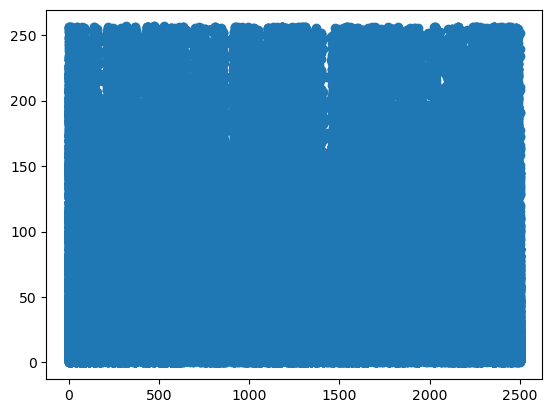

In [56]:
plt.scatter(df_cleaned_zeros["customer"], df_cleaned_zeros["sum1"])
plt.show()
            
            

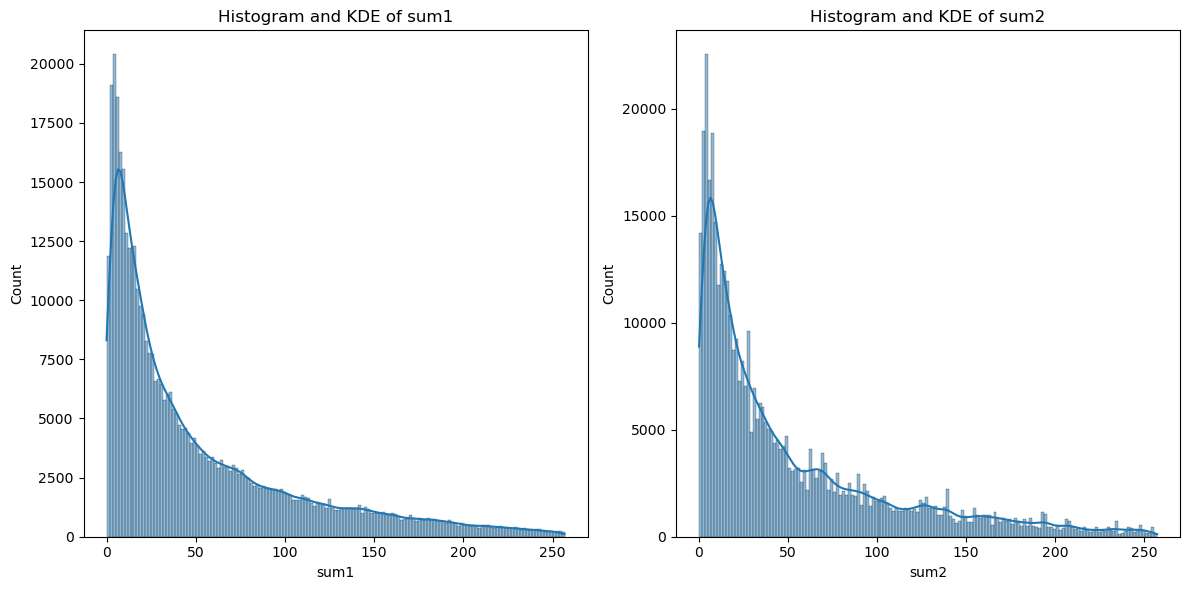

In [57]:
# Plot histogram and KDE for sum1 and sum2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Sum1
sns.histplot(df_cleaned_zeros['sum1'], kde=True, ax=ax1)
ax1.set_title('Histogram and KDE of sum1')

# Sum2
sns.histplot(df_cleaned_zeros['sum2'], kde=True, ax=ax2)
ax2.set_title('Histogram and KDE of sum2')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the 'margins' column using the formula (sum2 - sum1) / sum1
#df['margins'] = (df['sum2'] - df['sum1']) / df['sum1']
df_Tao_yin_users["margins"] = (df_Tao_yin_users["sum2"] - df_Tao_yin_users["sum1"]) / df_Tao_yin_users["sum1"]
df_Tao_yin_users.head(20)